In [55]:

# Machine learning is a useful tool that enables the creation and use of modules learned from data. We utilize machine learning to analyze
# existing data and build predictive models for new data, For instance, determining whether an email message is classified as spam or not 
# and which advertisement is most likely to be clicked on by a shopper. 
# There are three types of ML, which are supervised learning, unsupervised learning, and reinforcement learning. 
# Supervised learning is a process of teaching algorithms to make predictions and identify patterns based on a provided dataset.
# Unsupervised learning is supervised learning algorithms that learn the relationship between inputs and outputs through labeled training.
# Reinforcement learning is a type of training where software is taught to make decisions that lead to the most optimal outcomes. 
# Reinforcement learning is the most popular type that is used nowadays. It shows in all types of life applications,
# such as robotics, games, autonomous driving, data center cooling, healthcare, personalized recommendations, deep learning,
# recommender systems, gaming, and traffic control. 
# It is important to avoid using machine learning when we do not have adequate data, or it is impossible to collect more data.
# For instance, if we need to predict a company's sales from its repeat customers, we must have access to the historical sales data.
# If we are unable to provide the historical sales data, then we should refrain from using machine learning. 
#It is necessary to note that if there is an existing ideal solution available, we should refrain from using machine learning as well. 


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("loans_full_schema.csv")
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [82]:
df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [57]:


loans = pd.read_csv(file_path)


loans.loc[:, 'emp_length'] = loans['emp_length'].fillna(loans['emp_length'].median())
loans.loc[:, 'annual_income_joint'] = loans['annual_income_joint'].fillna(0)
loans.loc[:, 'debt_to_income_joint'] = loans['debt_to_income_joint'].fillna(0)


loans = loans.drop(['emp_title', 'verification_income_joint'], axis=1)


loans.loc[:, 'income_verified'] = loans['verified_income'].apply(lambda x: 1 if x != 'Not Verified' else 0)

print(loans.head())

   emp_length state homeownership  annual_income  verified_income  \
0         3.0    NJ      MORTGAGE        90000.0         Verified   
1        10.0    HI          RENT        40000.0     Not Verified   
2         3.0    WI          RENT        40000.0  Source Verified   
3         1.0    PA          RENT        30000.0     Not Verified   
4        10.0    CA          RENT        35000.0         Verified   

   debt_to_income  annual_income_joint  debt_to_income_joint  delinq_2y  \
0           18.01                  0.0                  0.00          0   
1            5.04                  0.0                  0.00          0   
2           21.15                  0.0                  0.00          0   
3           10.16                  0.0                  0.00          0   
4           57.96              57000.0                 37.66          0   

   months_since_last_delinq  ...  issue_month  loan_status  \
0                      38.0  ...     Mar-2018      Current   
1         

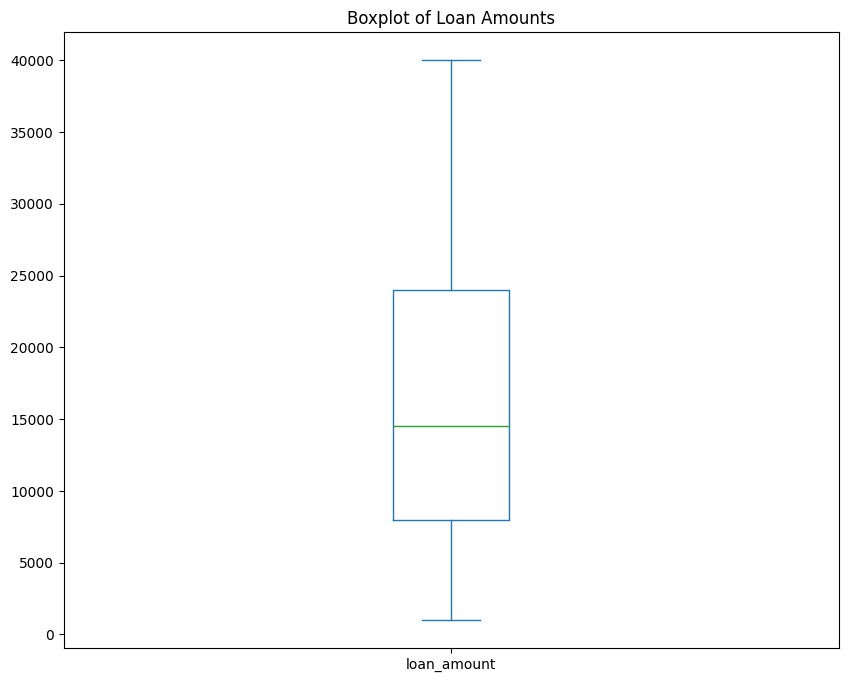

In [58]:

df['loan_amount'].plot(kind='box', title= 'Boxplot of Loan Amounts', figsize=(10,8))
plt.show()




In [ ]:
# The plot shows the median amount of loan which is 15.000 %. 

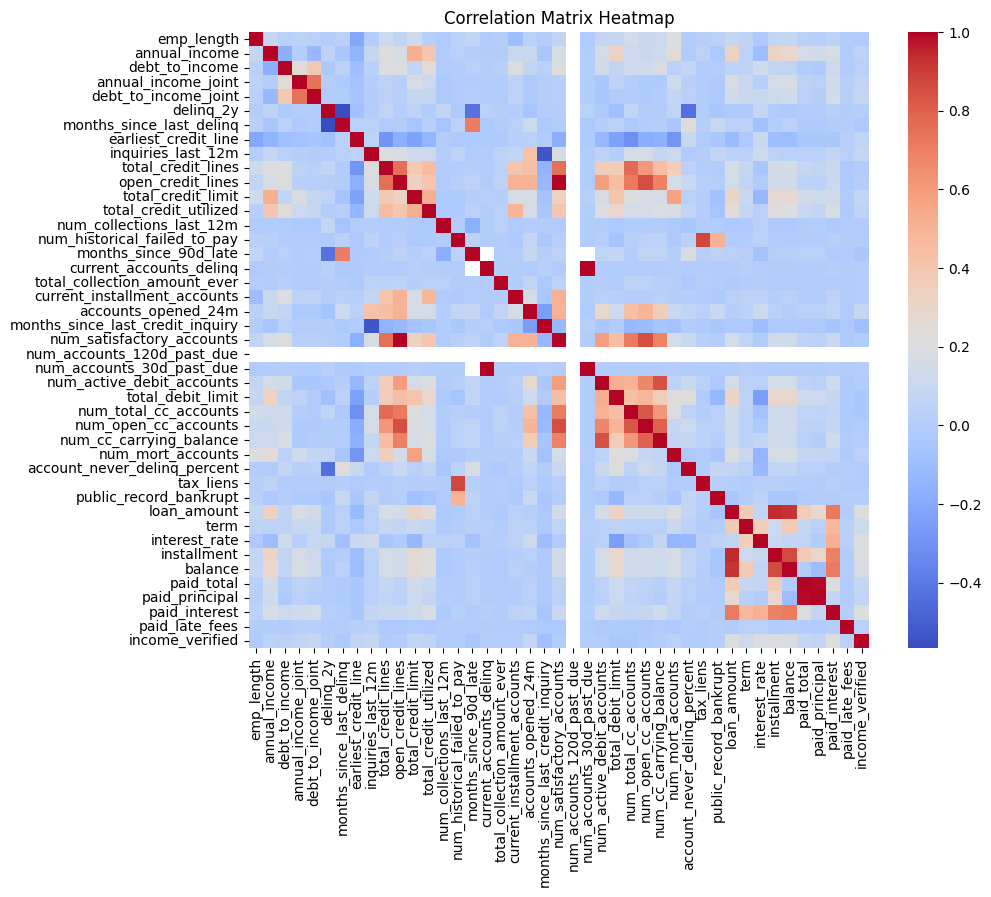

In [59]:
numeric_cols = loans.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

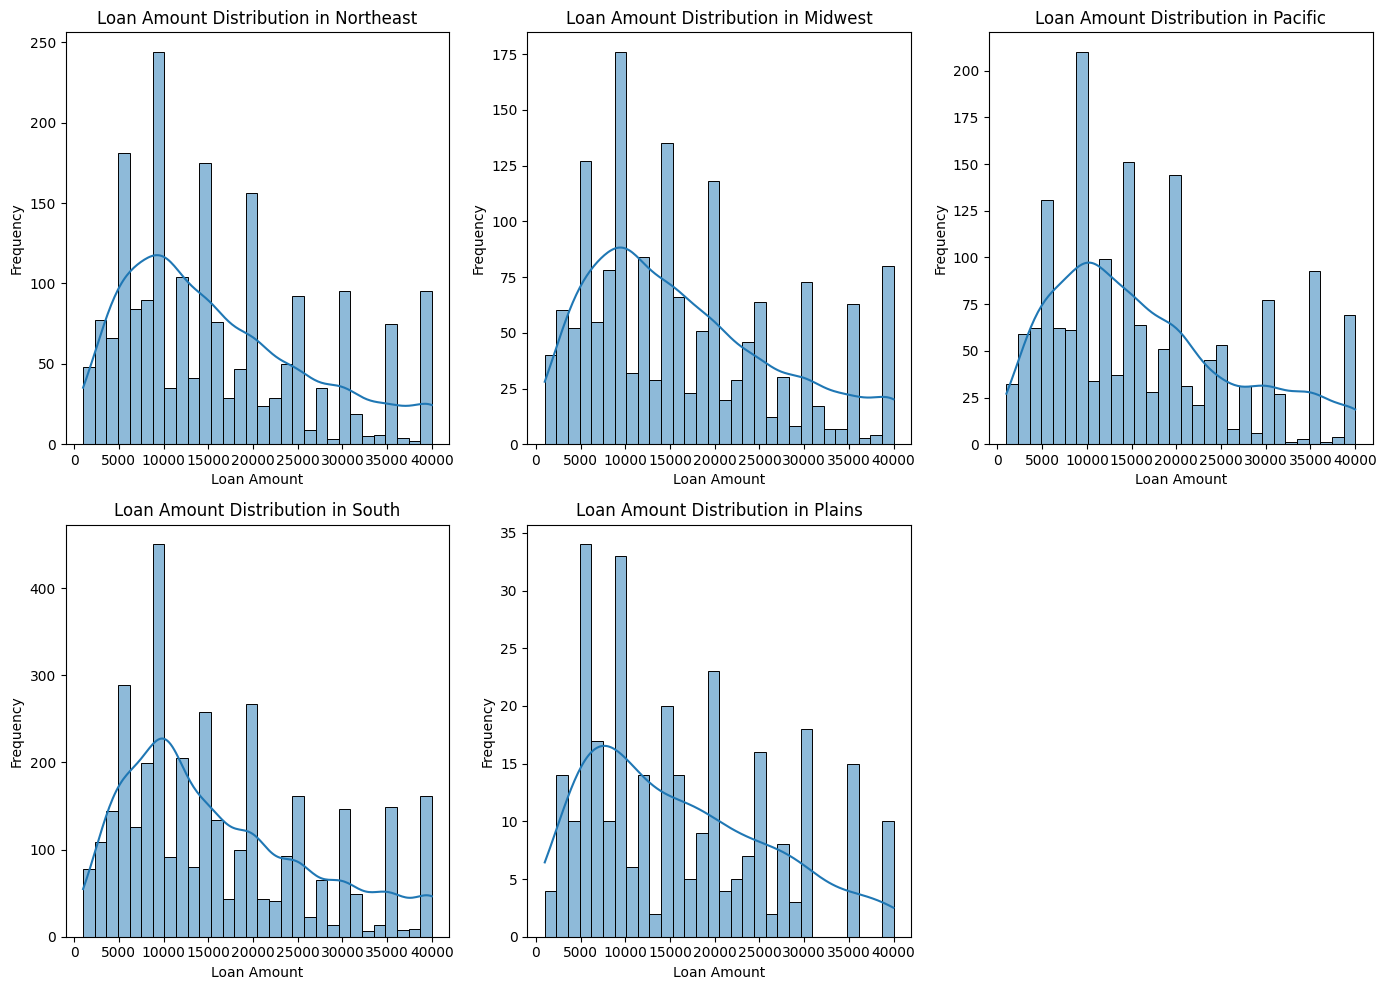

In [60]:
# Q5
def state_to_region(state):
    pacific = ['WA', 'OR', 'CA']
    plains = ['MT', 'ND', 'SD', 'WY', 'NE', 'KS', 'OK']
    midwest = ['MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH']
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    south = ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'OK', 'TX', 'AR', 'LA']
    
    if state in pacific:
        return "Pacific"
    elif state in plains:
        return "Plains"
    elif state in midwest:
        return "Midwest"
    elif state in northeast:
        return "Northeast"
    elif state in south:
        return "South"
    else:
        return np.nan

loans['region'] = loans['state'].apply(state_to_region)

loans.dropna(subset=['loan_amount', 'region'], inplace=True)

plt.figure(figsize=(14, 10))
for idx, region in enumerate(loans['region'].unique(), start=1):
    plt.subplot(2, 3, idx)
    region_data = loans[loans['region'] == region]
    sns.histplot(region_data['loan_amount'], bins=30, kde=True)
    plt.title(f'Loan Amount Distribution in {region}')
    plt.xlabel('Loan Amount')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
# The analysis of loan amounts by region and the overall distribution reveals that while loan amounts generally follow a similar distribution pattern across the US. 

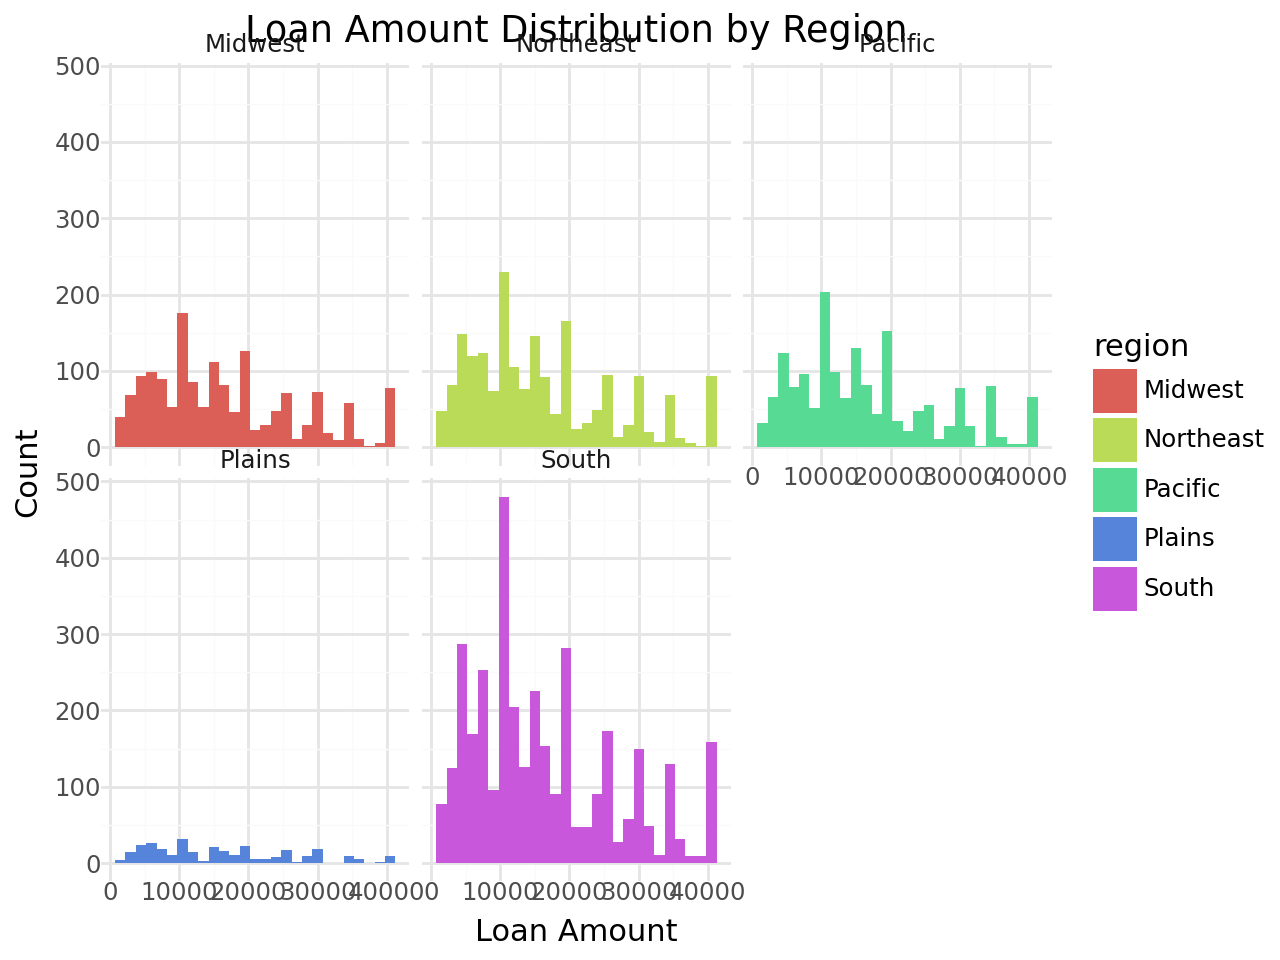

In [91]:
loans['region'] = loans['state'].apply(state_to_region)

plot = ggplot(loans, aes(x='loan_amount', fill='region')) + \
       geom_histogram(binwidth=1500, position="dodge") + \
       facet_wrap('~region') + \
       labs(title="Loan Amount Distribution by Region", x="Loan Amount", y="Count") + \
       theme_minimal()

plot.show()
